In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [4]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

import librosa
import librosa.display
from IPython.display import Audio
import warnings


import keras
from keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.utils import to_categorical
from keras.callbacks import ModelCheckpoint




warnings.filterwarnings("ignore")

In [5]:
# Paths for data.
Cremad = "/kaggle/input/cremad/AudioWAV"
Ravdess = "/kaggle/input/ravdess-emotional-speech-audio/audio_speech_actors_01-24/"
Savee = "/kaggle/input/savee-database/AudioData"

In [6]:
crema_dir = os.listdir(Cremad)

emotions = []
paths = []

for file in crema_dir:
    # storing file paths
    paths.append(Cremad+"/" + file)
    # storing file emotions
    part=file.split('_')
    emotions.append(part[2])
    
#  Creating dataframe out of lists       
emotion_df = pd.DataFrame(emotions, columns=['Emotions'])
path_df = pd.DataFrame(paths, columns=['Path'])


Crema_df = pd.concat([emotion_df, path_df], axis=1)

e_dict={'DIS':'disgusted', 'HAP':'happy', 'SAD':'sad', 'FEA':'fear', 'ANG':'angry', 'NEU':'neutral'}
Crema_df["Emotions"]=Crema_df["Emotions"].apply(lambda x : e_dict[x])

del emotion_df
del path_df

Crema_df.head()

Emotions                                               Path
0  disgusted  /kaggle/input/cremad/AudioWAV/1028_TSI_DIS_XX.wav
1      happy  /kaggle/input/cremad/AudioWAV/1075_IEO_HAP_LO.wav
2      happy  /kaggle/input/cremad/AudioWAV/1084_ITS_HAP_XX.wav
3  disgusted  /kaggle/input/cremad/AudioWAV/1067_IWW_DIS_XX.wav
4  disgusted  /kaggle/input/cremad/AudioWAV/1066_TIE_DIS_XX.wav

In [7]:
Crema_df["Emotions"].value_counts()

Emotions
disgusted    1271
happy        1271
sad          1271
fear         1271
angry        1271
neutral      1087
Name: count, dtype: int64

In [8]:
ravdess_directory_list = os.listdir(Ravdess)
file_emotion = []

file_path = []
for i in ravdess_directory_list:
    actor = os.listdir(Ravdess +"/"+ i)
    for file in actor:
        part = file.split('.')[0]
        part = part.split('-')
        # third part in each file is emotion
        file_emotion.append(int(part[2]))
        file_path.append(Ravdess+"/" + i + '/' + file)
        
# list to dataframe
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])
path_df = pd.DataFrame(file_path, columns=['Path'])

# Combining 
Ravdess_df = pd.concat([emotion_df, path_df], axis=1)

# int to emotion
Ravdess_df.Emotions.replace({1:'neutral', 2:'calm', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgusted', 8:'surprised'}, inplace=True)
Ravdess_df.head()

Emotions                                               Path
0  surprised  /kaggle/input/ravdess-emotional-speech-audio/a...
1    neutral  /kaggle/input/ravdess-emotional-speech-audio/a...
2  disgusted  /kaggle/input/ravdess-emotional-speech-audio/a...
3  disgusted  /kaggle/input/ravdess-emotional-speech-audio/a...
4    neutral  /kaggle/input/ravdess-emotional-speech-audio/a...

In [9]:
Ravdess_df["Emotions"].value_counts()

Emotions
surprised    192
disgusted    192
fear         192
sad          192
calm         192
happy        192
angry        192
neutral       96
Name: count, dtype: int64

In [10]:
# used "next" with "walk" cause "os.listdir" gives error 
directory_list = next(os.walk("/kaggle/input/savee-database/AudioData"))[1]
file_emotion = []

file_path = []
for i in directory_list:
    actor = os.listdir(Savee +"/"+ i)
    for file in actor:       
        file_emotion.append(file[:-6])
        file_path.append(Savee+"/" + i + '/' + file)
        
# list to dataframe
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])
path_df = pd.DataFrame(file_path, columns=['Path'])

# Combining 
Savee_df = pd.concat([emotion_df, path_df], axis=1)

# letter to full emotion
Savee_df.Emotions.replace({'a':'angry', 'd':'disgusted', 'f':'fear', 'h':'happy', 'n':'neutral', 'sa':'sad' , 'su':'surprised'}, inplace=True)
Savee_df.head()

Emotions                                               Path
0    neutral  /kaggle/input/savee-database/AudioData/DC/n26.wav
1  surprised  /kaggle/input/savee-database/AudioData/DC/su06...
2  surprised  /kaggle/input/savee-database/AudioData/DC/su01...
3      happy  /kaggle/input/savee-database/AudioData/DC/h10.wav
4  surprised  /kaggle/input/savee-database/AudioData/DC/su10...

In [11]:
# creating Dataframe using above 3 dataframes.
df = pd.concat([Ravdess_df, Crema_df, Savee_df], axis = 0)
df.to_csv("data.csv",index=False)
df.head()

Emotions                                               Path
0  surprised  /kaggle/input/ravdess-emotional-speech-audio/a...
1    neutral  /kaggle/input/ravdess-emotional-speech-audio/a...
2  disgusted  /kaggle/input/ravdess-emotional-speech-audio/a...
3  disgusted  /kaggle/input/ravdess-emotional-speech-audio/a...
4    neutral  /kaggle/input/ravdess-emotional-speech-audio/a...

In [12]:
#saved the file in the downloads section in speech_emo_jupyter
df.to_csv("C:\\Users\\RAJASEKAR\\Downloads\\speech_emo_jupyter\\data.csv", index=False)

In [13]:
df.reset_index(drop=True,inplace=True)

In [14]:
df["Emotions"].value_counts()

Emotions
disgusted    1523
fear         1523
sad          1523
happy        1523
angry        1523
neutral      1303
surprised     252
calm          192
Name: count, dtype: int64

Text(0.5, 1.0, 'Count of Emotions')

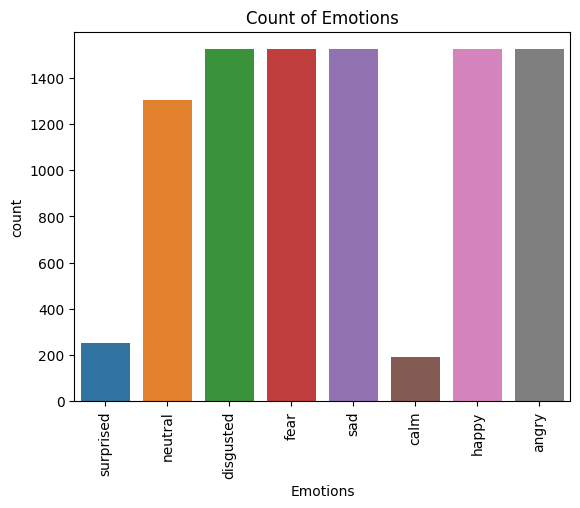

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.xticks( rotation='vertical')
sns.countplot(data=df, x="Emotions")
plt.title("Count of Emotions")

In [16]:
def waveplot(data,sr,emotion):
    plt.figure(figsize=(10,4))
    plt.title(emotion,size=20)
    librosa.display.waveshow(data,sr=sr)
    plt.show()

def spectogram(data,sr,emotion):
    x=librosa.stft(data)
    xdb=librosa.amplitude_to_db(abs(x))
    plt.figure(figsize=(11,4))
    plt.title(emotion,size=20)
    librosa.display.specshow(xdb,sr=sr,x_axis="time",y_axis="hz")
    plt.colorbar()

In [17]:
emot=["disgusted","fear","sad","happy","angry","neutral","surprised","calm"]

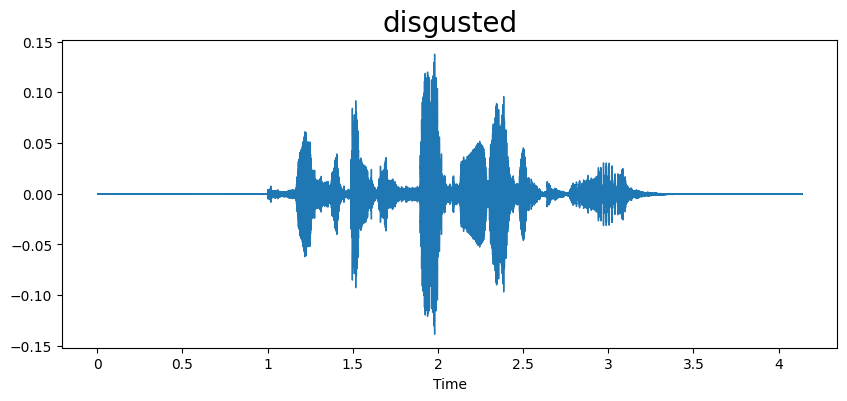

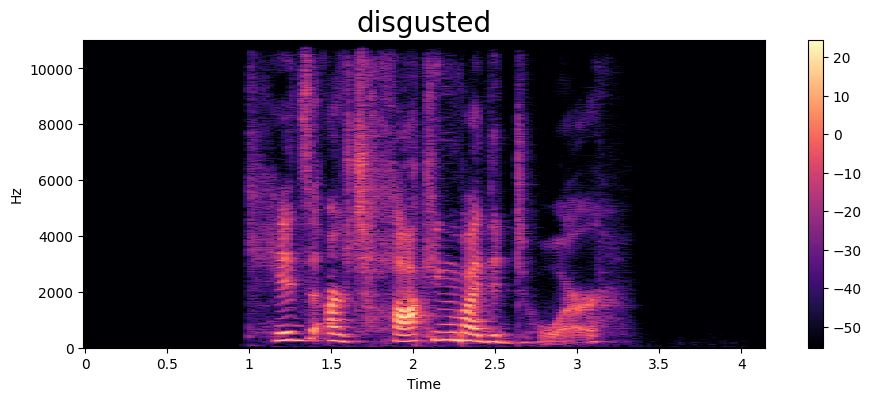

In [18]:
# had to downgrade the numba verison so that its version matches with numpy and being compatible
emotion=emot[0]
path=np.array(df["Path"][df["Emotions"]==emotion])[0]
data,sampling_rate=librosa.load(path)

waveplot(data,sampling_rate,emotion) #calling fuction of waveform
spectogram(data,sampling_rate,emotion) #calling function of spectrogram
Audio(path) #audio to hear in the output

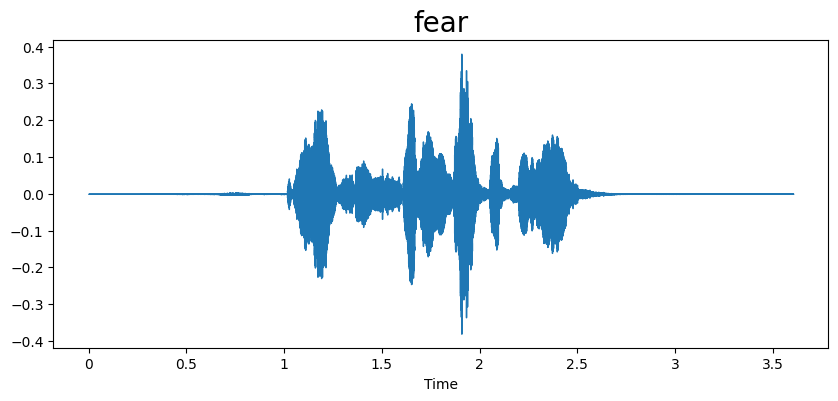

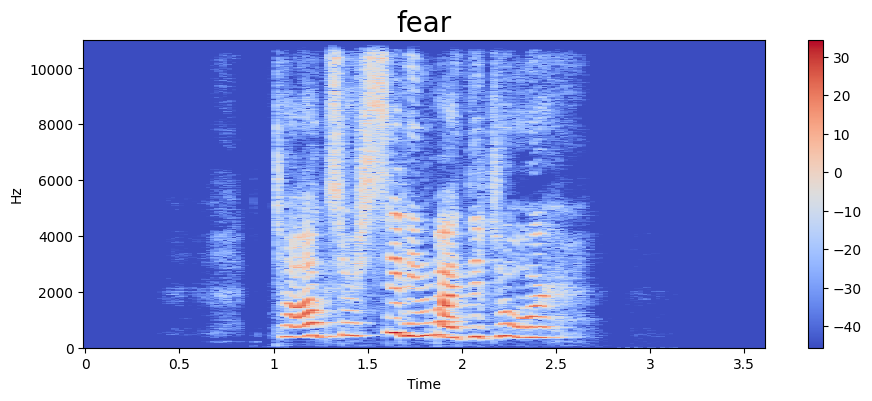

In [19]:
emotion=emot[1]
path=np.array(df["Path"][df["Emotions"]==emotion])[0]
data,sampling_rate=librosa.load(path)

waveplot(data,sampling_rate,emotion)
spectogram(data,sampling_rate,emotion)
Audio(path)

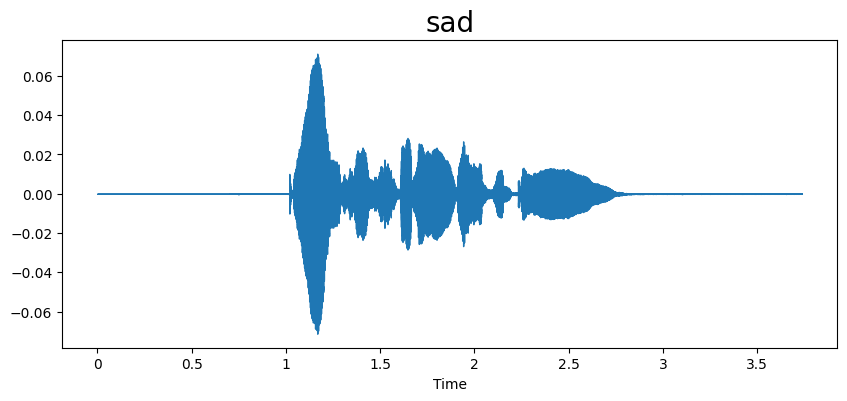

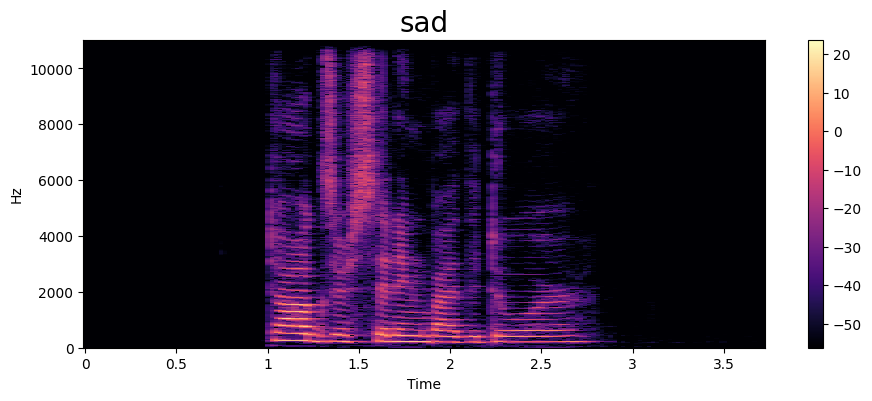

In [20]:
emotion=emot[2]
path=np.array(df["Path"][df["Emotions"]==emotion])[0]
data,sampling_rate=librosa.load(path)

waveplot(data,sampling_rate,emotion)
spectogram(data,sampling_rate,emotion)
Audio(path)

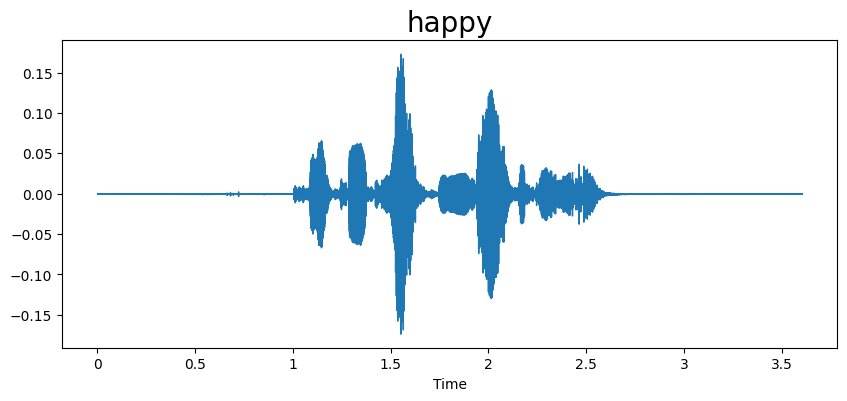

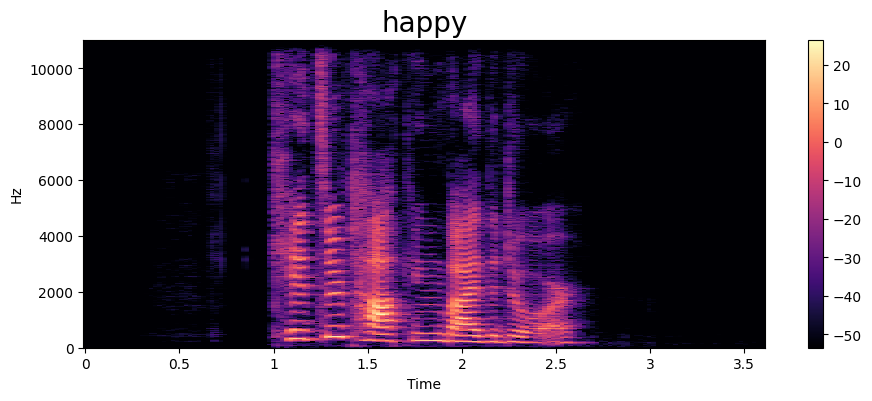

In [21]:
emotion=emot[3]
path=np.array(df["Path"][df["Emotions"]==emotion])[0]
data,sampling_rate=librosa.load(path)

waveplot(data,sampling_rate,emotion)
spectogram(data,sampling_rate,emotion)
Audio(path)

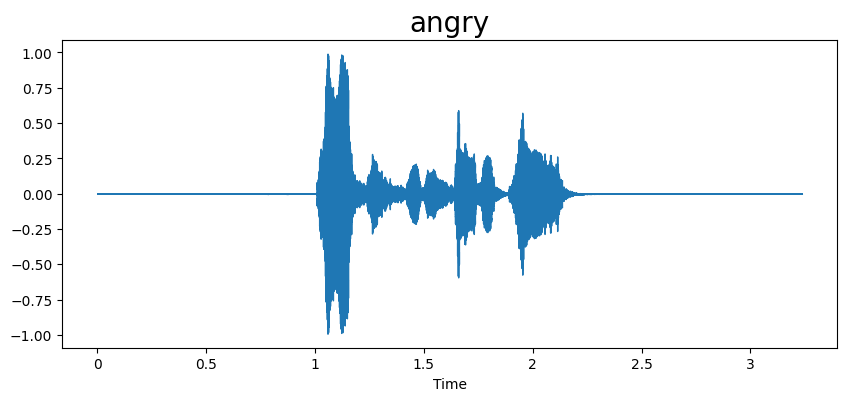

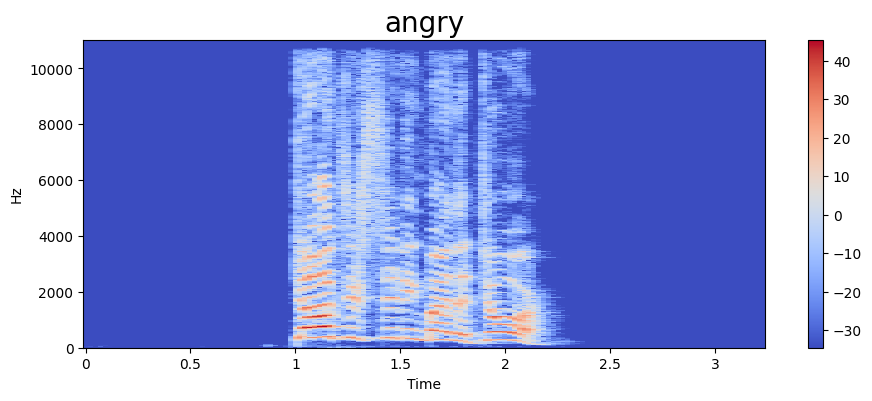

In [22]:
emotion=emot[4]
path=np.array(df["Path"][df["Emotions"]==emotion])[100]
data,sampling_rate=librosa.load(path)

waveplot(data,sampling_rate,emotion)
spectogram(data,sampling_rate,emotion)
Audio(path)

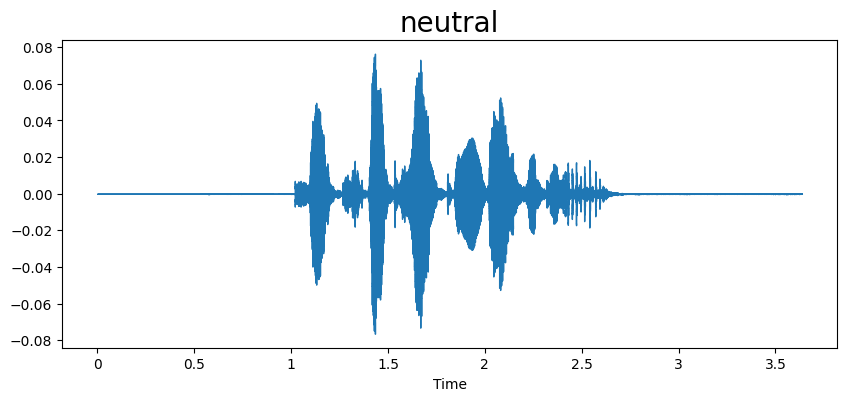

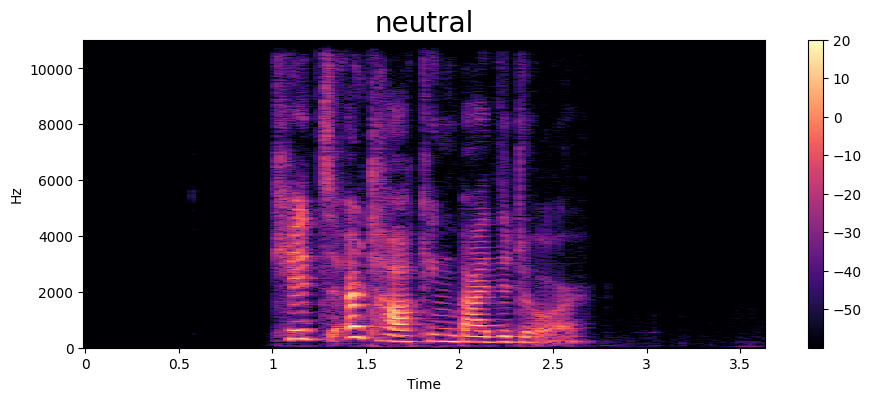

In [23]:
emotion=emot[5]
path=np.array(df["Path"][df["Emotions"]==emotion])[0]
data,sampling_rate=librosa.load(path)

waveplot(data,sampling_rate,emotion)
spectogram(data,sampling_rate,emotion)
Audio(path)

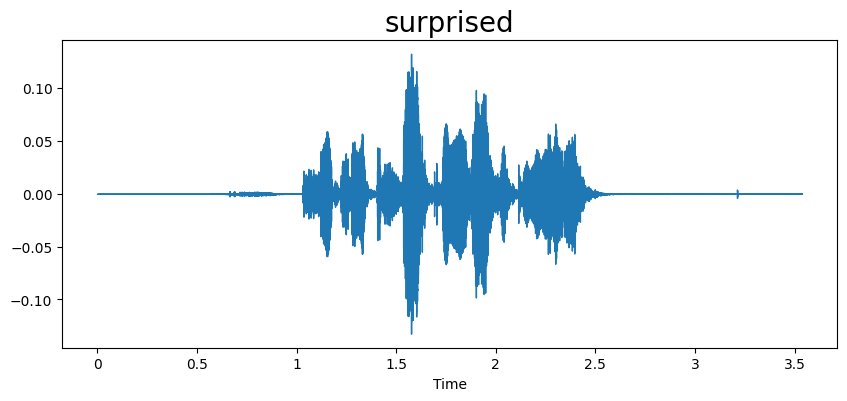

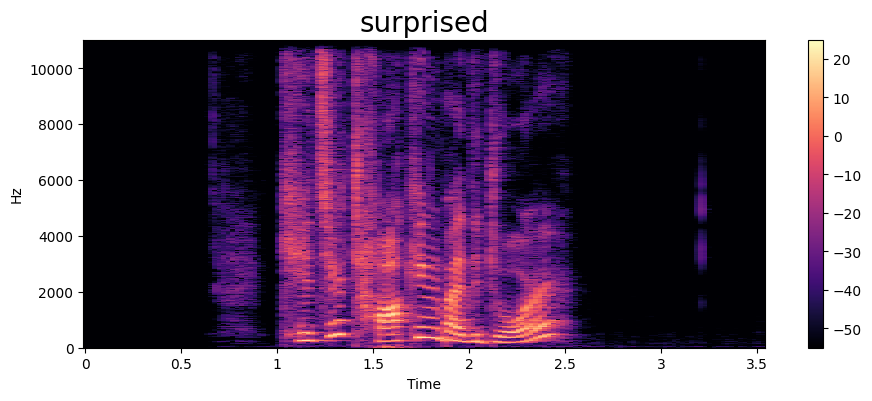

In [24]:
emotion=emot[6]
path=np.array(df["Path"][df["Emotions"]==emotion])[0]
data,sampling_rate=librosa.load(path)

waveplot(data,sampling_rate,emotion)
spectogram(data,sampling_rate,emotion)
Audio(path)

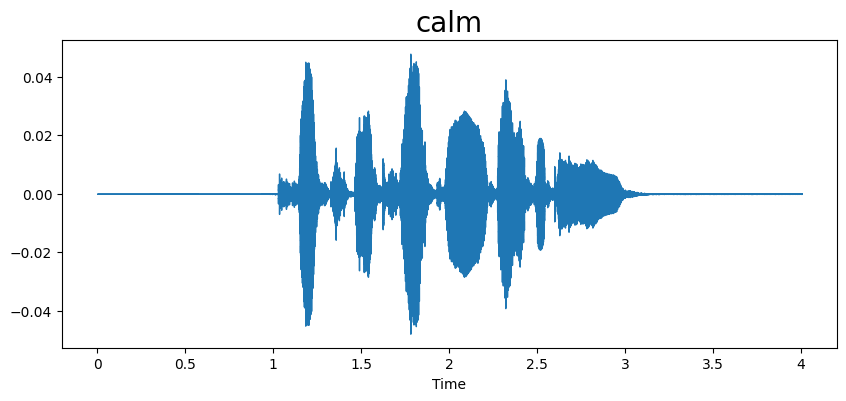

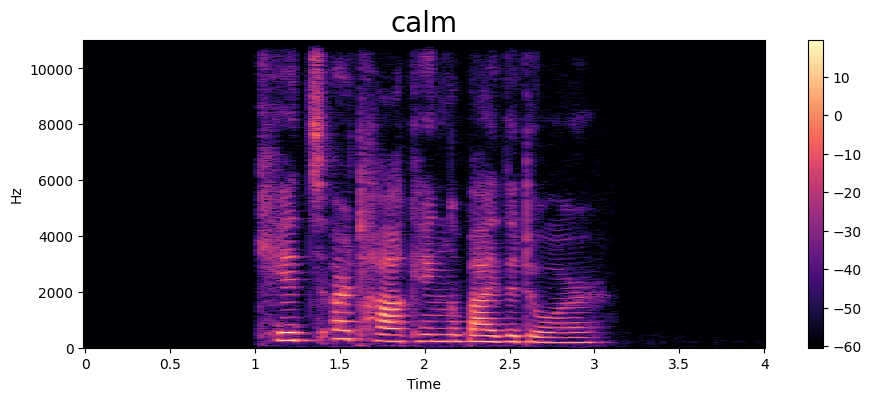

In [25]:
emotion=emot[7]
path=np.array(df["Path"][df["Emotions"]==emotion])[0]
data,sampling_rate=librosa.load(path)

waveplot(data,sampling_rate,emotion)
spectogram(data,sampling_rate,emotion)
Audio(path)

In [26]:
#for providing more accurate values, the augmented data is to be fed to the neural network.
def noise(data):
    noise_amp = 0.030*np.random.uniform()*np.amax(data)
    data = data + noise_amp*np.random.normal(size=data.shape[0])
    return data

def stretch(data, rate=0.75):
    return librosa.effects.time_stretch(data,rate=0.75)

def shift(data):
    shift_range = int(np.random.uniform(low=-5, high = 5)*1000)
    return np.roll(data, shift_range)

def pitch(data, sampling_rate, pitch_factor=0.75):
    return librosa.effects.pitch_shift(data,sr=sampling_rate, n_steps=0.75) #sr and n_steps are syntax,dont change them

#just to check the augmentation techniques
path = np.array(df.Path)[1]
data, sample_rate = librosa.load(path)

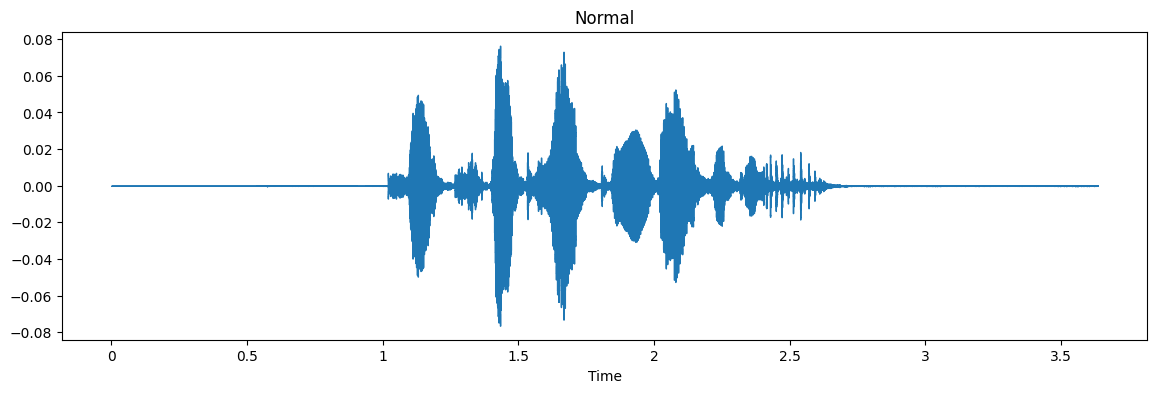

In [27]:
# normal
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=data, sr=sample_rate)
plt.title("Normal")
Audio(path)

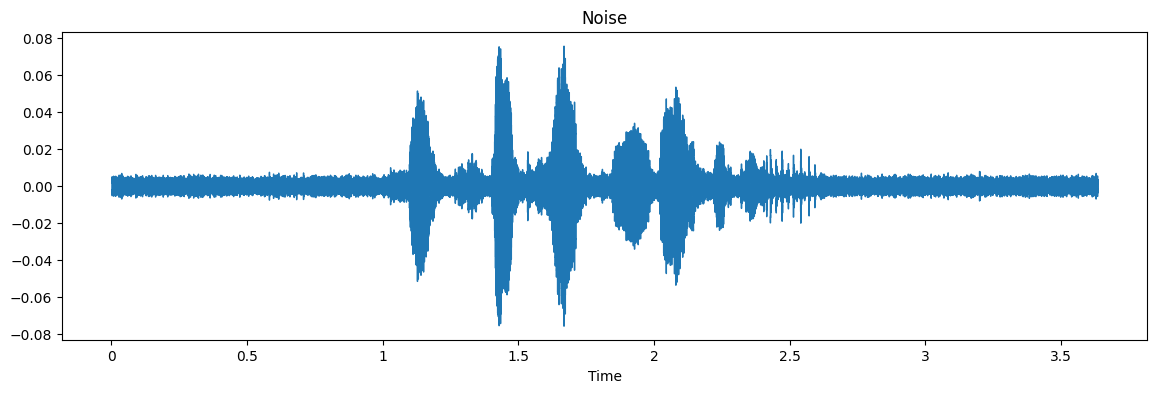

In [28]:
# noise
x = noise(data)
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=x, sr=sample_rate)
plt.title("Noise")
Audio(x, rate=sample_rate)

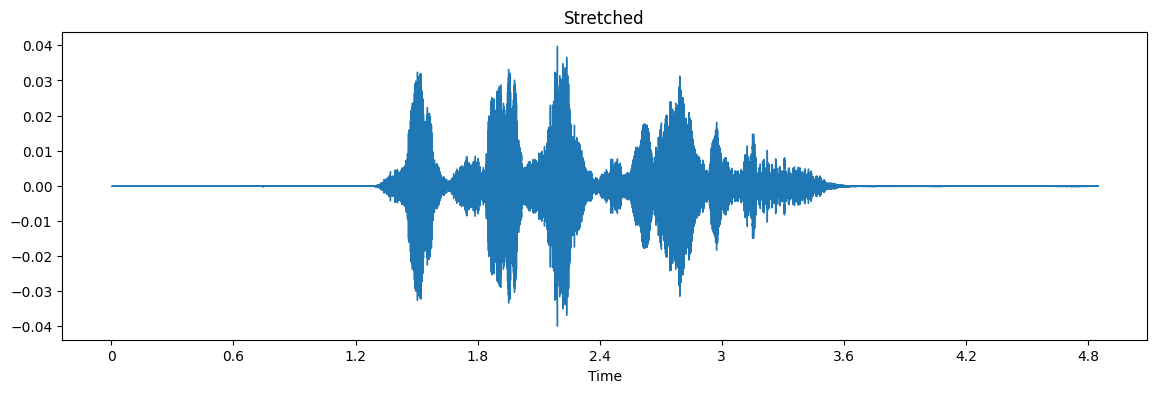

In [29]:
# stretching
x = stretch(data)
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=x, sr=sample_rate)
plt.title("Stretched")
Audio(x, rate=sample_rate)

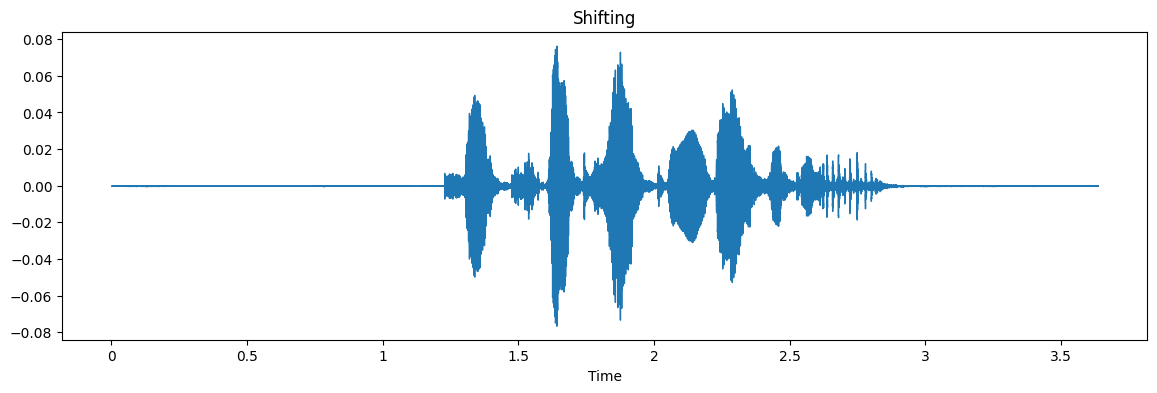

In [30]:
# shifting
x = shift(data)
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=x, sr=sample_rate)
plt.title("Shifting")
Audio(x, rate=sample_rate)

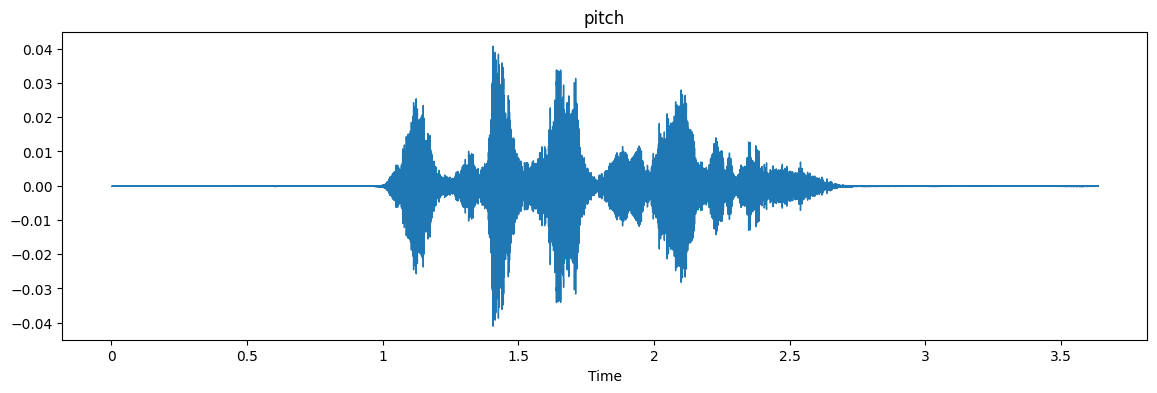

In [31]:
# pitch
x = pitch(data,sample_rate)
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=x, sr=sample_rate)
plt.title("pitch")
Audio(x, rate=sample_rate)

In [32]:
#Feature extraction
def extract_features(data):
    # ZCR
    result = np.array([])
    zcr = np.mean(librosa.feature.zero_crossing_rate(y=data).T, axis=0)
    result=np.hstack((result, zcr)) # stacking horizontally

    # Chroma_stft
    stft = np.abs(librosa.stft(data))
    chroma_stft = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T, axis=0)
    result = np.hstack((result, chroma_stft)) 

    # MFCC
    mfcc = np.mean(librosa.feature.mfcc(y=data, sr=sample_rate).T, axis=0)
    result = np.hstack((result, mfcc)) 

    # Root Mean Square Value
    rms = np.mean(librosa.feature.rms(y=data).T, axis=0)
    result = np.hstack((result, rms)) 

    # MelSpectogram
    mel = np.mean(librosa.feature.melspectrogram(y=data, sr=sample_rate).T, axis=0)
    result = np.hstack((result, mel)) 
    
    return result

def get_features(path):
    # duration and offset are used to take care of 
#     the no audio in start and the ending of each audio files as seen above.
    data, sample_rate = librosa.load(path, duration=2.5, offset=0.6)
    
    # without augmentation
    res1 = extract_features(data)
    result = np.array(res1)
    
    # with noise
    noise_data = noise(data)
    res2 = extract_features(noise_data)
    result = np.vstack((result, res2)) 
    
    # stretching and pitching
    new_data = stretch(data)
    data_stretch_pitch = pitch(new_data, sample_rate)
    res3 = extract_features(data_stretch_pitch)
    result = np.vstack((result, res3)) 
    
    return result

In [33]:
#interrupted the kernel as it takes several hours
X, Y = [], []

di=zip(df["Path"], df["Emotions"])
for path, emotion in di :
    feature = get_features(path)
    for ele in feature:
        X.append(ele)
        Y.append(emotion)

In [34]:
len(X), len(Y), df["Path"].shape

(28086, 28086, (9362,))

In [35]:
new_df = pd.DataFrame(X)
new_df['Emotions'] = Y
new_df.to_csv('dataframe.csv', index=False)
new_df.head()

0         1         2         3         4         5         6  \
0  0.237382  0.682273  0.670519  0.614793  0.579039  0.566803  0.637206   
1  0.278980  0.684299  0.686067  0.658160  0.641926  0.690319  0.688846   
2  0.177755  0.700194  0.672794  0.643152  0.584736  0.522801  0.581188   
3  0.256113  0.621621  0.580278  0.598515  0.628296  0.598014  0.597272   
4  0.324472  0.694802  0.688809  0.724617  0.768518  0.740849  0.691643   

          7         8         9  ...       153       154       155       156  \
0  0.667451  0.663883  0.669903  ...  0.000234  0.000235  0.000138  0.000128   
1  0.693010  0.675821  0.686610  ...  0.000261  0.000256  0.000167  0.000155   
2  0.672747  0.675791  0.643296  ...  0.000057  0.000085  0.000077  0.000081   
3  0.650352  0.698635  0.681863  ...  0.000018  0.000016  0.000013  0.000012   
4  0.687206  0.734257  0.736328  ...  0.000243  0.000229  0.000230  0.000228   

        157       158       159       160           161   Emotions  
0  0.000299  0.000360  0.000275  0.000173  2.896729e-05  surprised  
1  0.000327  0.000392  0.000303  0.000200  5.504044e-05  surprised  
2  0.000027  0.000044  0.000080  0.000046  4.110999e-06  surprised  
3  0.000007  0.000008  0.000008  0.000005  5.802854e-07    neutral  
4  0.000232  0.000224  0.000221  0.000236  2.272162e-04    neutral  

[5 rows x 163 columns]

In [36]:
X = new_df.iloc[: ,:-1].values
Y = new_df['Emotions'].values

In [37]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
Y = encoder.fit_transform(np.array(Y).reshape(-1,1)).toarray()

In [38]:
from sklearn.model_selection import train_test_split
# splitting data
x_train, x_test, y_train, y_test = train_test_split(X, Y,test_size=0.20 , shuffle=True) #can reduce test size(testing proportion)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((22468, 162), (22468, 8), (5618, 162), (5618, 8))

In [39]:
from sklearn.preprocessing import StandardScaler
# scaling our data with sklearn's Standard scaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((22468, 162), (22468, 8), (5618, 162), (5618, 8))

In [40]:
# making our data compatible to model.
x_train = np.expand_dims(x_train, axis=2)
x_test = np.expand_dims(x_test, axis=2)

In [41]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((22468, 162, 1), (22468, 8), (5618, 162, 1), (5618, 8))

In [77]:
# model

model = Sequential()
model.add(Conv1D(128, 3, activation='relu', input_shape=(x_train.shape[1], 1)))
model.add(MaxPooling1D((1)))
model.add(Conv1D(256, 3, activation='relu'))
model.add(MaxPooling1D((1)))
model.add(Conv1D(512, 3, activation='relu'))
model.add(MaxPooling1D((1)))
model.add(Conv1D(1024, 3, activation='relu'))
model.add(MaxPooling1D((1)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(8, activation='softmax'))

model.compile(loss='categorical_crossentropy',
             optimizer="adam",
             metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_4 (Conv1D)           (None, 160, 128)          512       
                                                                 
 max_pooling1d_4 (MaxPooling  (None, 160, 128)         0         
 1D)                                                             
                                                                 
 conv1d_5 (Conv1D)           (None, 158, 256)          98560     
                                                                 
 max_pooling1d_5 (MaxPooling  (None, 158, 256)         0         
 1D)                                                             
                                                                 
 conv1d_6 (Conv1D)           (None, 156, 512)          393728    
                                                                 
 max_pooling1d_6 (MaxPooling  (None, 156, 512)        

In [78]:
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping


es=EarlyStopping(monitor='val_accuracy',patience=3)
rlrp = ReduceLROnPlateau(monitor='loss', factor=0.4, verbose=0, patience=2, min_lr=0.0000001)
model_22=model.fit(x_train, y_train, batch_size=128, epochs=50, validation_data=(x_test, y_test),callbacks=[rlrp,es])

Epoch 1/50
176/176 [==============================] - 15s 70ms/step - loss: 1.6262 - accuracy: 0.3441 - val_loss: 1.4760 - val_accuracy: 0.4176 - lr: 0.0010
Epoch 2/50
176/176 [==============================] - 12s 69ms/step - loss: 1.4343 - accuracy: 0.4303 - val_loss: 1.3501 - val_accuracy: 0.4585 - lr: 0.0010
Epoch 3/50
176/176 [==============================] - 12s 70ms/step - loss: 1.3060 - accuracy: 0.4892 - val_loss: 1.2986 - val_accuracy: 0.4867 - lr: 0.0010
Epoch 4/50
176/176 [==============================] - 12s 69ms/step - loss: 1.1704 - accuracy: 0.5466 - val_loss: 1.2110 - val_accuracy: 0.5297 - lr: 0.0010
Epoch 5/50
176/176 [==============================] - 12s 70ms/step - loss: 1.0239 - accuracy: 0.6096 - val_loss: 1.1593 - val_accuracy: 0.5698 - lr: 0.0010
Epoch 6/50
176/176 [==============================] - 12s 69ms/step - loss: 0.8635 - accuracy: 0.6752 - val_loss: 1.1289 - val_accuracy: 0.5874 - lr: 0.0010
Epoch 7/50
176/176 [==============================] - 12s 

In [80]:
num_epochs=18

703/703 [==============================] - 5s 8ms/step - loss: 0.0162 - accuracy: 0.9968
Training accuracy :  99.67954158782959 %
176/176 [==============================] - 1s 8ms/step - loss: 1.9240 - accuracy: 0.6278
Testing accuracy :  62.78035044670105 %


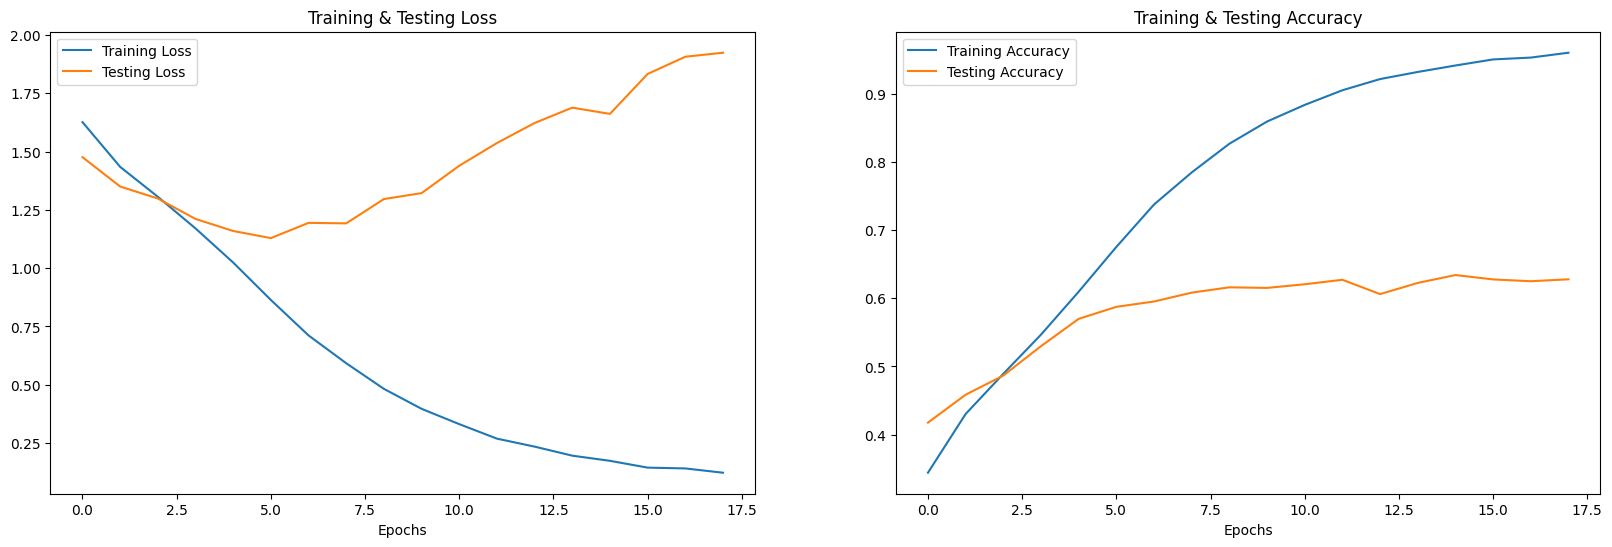

In [81]:
print("Training accuracy : " , model.evaluate(x_train,y_train)[1]*100 , "%")
print("Testing accuracy : " , model.evaluate(x_test,y_test)[1]*100 , "%")

epochs = [i for i in range(num_epochs)]
fig , ax = plt.subplots(1,2)
train_acc = model_22.history['accuracy']
train_loss = model_22.history['loss']
test_acc = model_22.history['val_accuracy']
test_loss = model_22.history['val_loss']

fig.set_size_inches(20,6)
ax[0].plot(epochs , train_loss , label = 'Training Loss')
ax[0].plot(epochs , test_loss , label = 'Testing Loss')
ax[0].set_title('Training & Testing Loss')
ax[0].legend()
ax[0].set_xlabel("Epochs")

ax[1].plot(epochs , train_acc , label = 'Training Accuracy')
ax[1].plot(epochs , test_acc , label = 'Testing Accuracy')
ax[1].set_title('Training & Testing Accuracy')
ax[1].legend()
ax[1].set_xlabel("Epochs")
plt.show()

In [82]:
# predicting on test data.
pred_test = model.predict(x_test)
y_pred = encoder.inverse_transform(pred_test)

y_test = encoder.inverse_transform(y_test)

176/176 [==============================] - 1s 6ms/step


In [83]:
c_df = pd.DataFrame(columns=['Predicted Labels', 'Actual Labels'])
c_df['Predicted Labels'] = y_pred.flatten()
c_df['Actual Labels'] = y_test.flatten()

In [85]:
c_df.sample(10)

Predicted Labels Actual Labels
1055          neutral       neutral
4321            happy         happy
4023              sad           sad
1589        disgusted     disgusted
3204        disgusted     disgusted
4447            happy         happy
346             angry         angry
1638            happy         happy
3025        surprised     surprised
4419             fear          fear

In [86]:
#saved the file in the downloads section in speech_emo_jupyter
c_df.to_csv("C:\\Users\\RAJASEKAR\\Downloads\\speech_emo_jupyter\\output.csv", index=False)

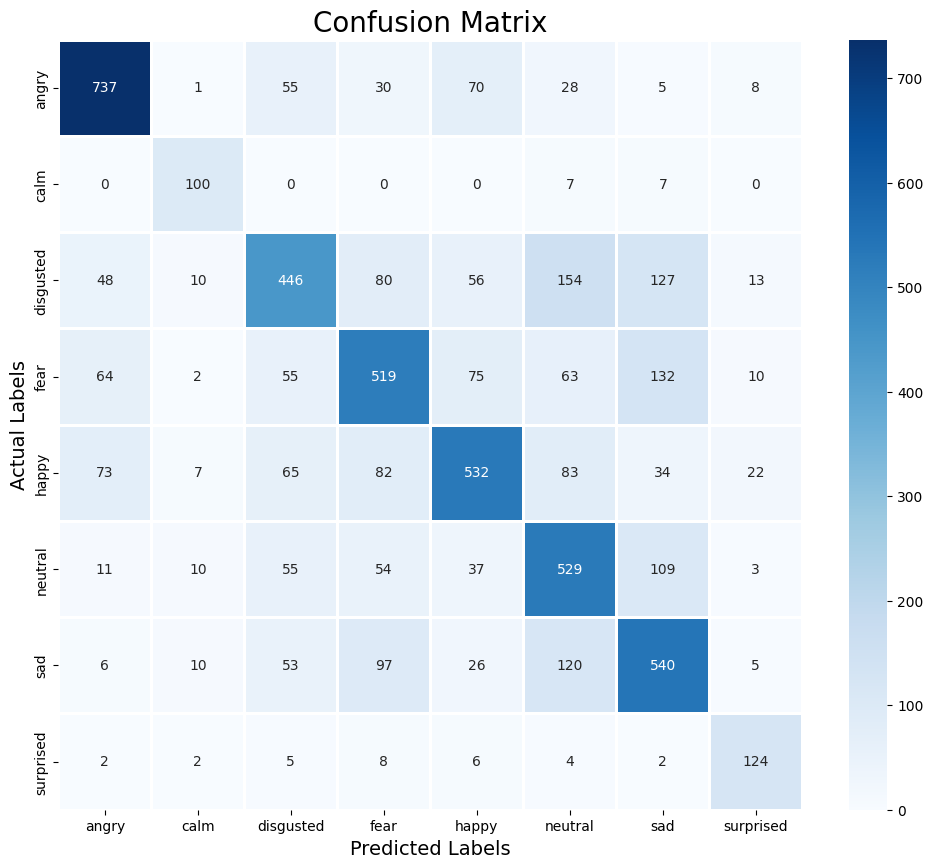

In [87]:
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (12, 10))
cm = pd.DataFrame(cm , index = [i for i in encoder.categories_] , columns = [i for i in encoder.categories_])
sns.heatmap(cm, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='')
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.show()

In [88]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       angry       0.78      0.79      0.79       934
        calm       0.70      0.88      0.78       114
   disgusted       0.61      0.48      0.53       934
        fear       0.60      0.56      0.58       920
       happy       0.66      0.59      0.63       898
     neutral       0.54      0.65      0.59       808
         sad       0.56      0.63      0.60       857
   surprised       0.67      0.81      0.73       153

    accuracy                           0.63      5618
   macro avg       0.64      0.67      0.65      5618
weighted avg       0.63      0.63      0.63      5618

